In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('ENGLAND-Football-Dataset.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21801 entries, 0 to 21800
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tournament     21801 non-null  object 
 1   home           21801 non-null  object 
 2   home_goal      21801 non-null  float64
 3   away_goal      21801 non-null  float64
 4   away           21801 non-null  object 
 5   home_corner    21801 non-null  float64
 6   away_corner    21801 non-null  float64
 7   home_attack    17113 non-null  float64
 8   away_attack    17113 non-null  float64
 9   home_shots     17154 non-null  float64
 10  away_shots     17142 non-null  float64
 11  time           21801 non-null  object 
 12  date           21801 non-null  object 
 13  ht_diff        21801 non-null  float64
 14  at_diff        21801 non-null  float64
 15  ht_result      21801 non-null  object 
 16  at_result      21801 non-null  object 
 17  total_corners  21801 non-null  float64
dtypes: flo

In [9]:
df.describe()

home_goal     away_goal   home_corner   away_corner   home_attack  \
count  21801.000000  21801.000000  21801.000000  21801.000000  17113.000000   
mean       1.421770      1.169258      5.555158      4.724875     92.975633   
std        1.225359      1.115147      2.894284      2.661308     28.427644   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      0.000000      3.000000      3.000000     72.000000   
50%        1.000000      1.000000      5.000000      4.000000     93.000000   
75%        2.000000      2.000000      7.000000      6.000000    113.000000   
max        9.000000      9.000000     20.000000     21.000000    233.000000   

        away_attack    home_shots    away_shots       ht_diff       at_diff  \
count  17113.000000  17154.000000  17142.000000  21801.000000  21801.000000   
mean      88.374686     12.387898     10.469665      0.252511     -0.252511   
std       27.717078      4.978195      4.471103      1.686059      1.686059   
min        2.000000      1.000000      1.000000     -9.000000     -9.000000   
25%       68.000000      9.000000      7.000000     -1.000000     -1.000000   
50%       88.000000     12.000000     10.000000      0.000000      0.000000   
75%      108.000000     15.000000     13.000000      1.000000      1.000000   
max      237.000000     47.000000     32.000000      9.000000      9.000000   

       total_corners  
count   21801.000000  
mean       10.280033  
std         3.537255  
min         0.000000  
25%         8.000000  
50%        10.000000  
75%        13.000000  
max        27.000000

La distribution des corners pour chaque équipe

In [5]:
import plotly.express as px

In [10]:
fig = px.histogram(df, x='home_corner', y='away_corner', marginal='box', nbins=50,
                   labels={'home_corner': 'Corners à domicile', 'away_corner': 'Corners extérieurs'},
                   color_discrete_sequence=['#636EFA'], opacity=0.8)
fig.update_layout(title='Distribution des corners pour les équipes à domicile et à l''extérieur',
                  xaxis_title='Nombre de Corners', yaxis_title='Count')
# fig.show()

In [12]:
fig = px.scatter(df, x='home_shots', y='home_goal', color='tournament',
                 labels={'home_shots': 'Coups à domicile', 'home_goal': 'Buts à domicile'})
fig.update_layout(title='Nombre de tirs par rapport aux buts marqués pour les équipes à domicile',
                  xaxis_title='Nombre de coups', yaxis_title='Nombre de buts')
fig.show()

Le nombre de matchs pour chaque tournoi

In [16]:
tournament_counts = df.groupby('tournament').size().reset_index(name='count')
fig = px.bar(tournament_counts, x='tournament', y='count',
             labels={'tournament': 'Tournoi', 'count': 'Number of Matches'},
             color_discrete_sequence=['#636EFA'], opacity=0.8)
fig.update_layout(title='Nombre de matchs par tournoi')
fig.show()

In [19]:
corners = pd.concat([df[['home', 'home_corner']].rename(columns={'home': 'team', 'home_corner': 'corners'}),
                     df[['away', 'away_corner']].rename(columns={'away': 'team', 'away_corner': 'corners'})])
fig = px.histogram(corners, x='corners', color='team', nbins=50,
                   labels={'corners': 'Nombre de corners', 'team': 'Equipe'},
                   color_discrete_sequence=['#636EFA', '#EF553B'], opacity=0.8)
fig.update_layout(title='Distribution des corners pour les équipes à domicile et à l''extérieur',
                  xaxis_title='Nombre de Corners', yaxis_title='Effectif')
fig.show()

Nombre de tirs contre nombre de buts marqués (équipe à domicile)

In [22]:
fig = px.scatter(df, x='home_shots', y='home_goal',
                 labels={'home_shots': 'Nombre de coups', 'home_goal': 'Nombre de buts'},
                 trendline='ols', opacity=0.8)
fig.update_layout(title='Nombre de tirs contre nombre de buts marqués (équipe à domicile)')
fig.show()

In [34]:
home_shots = df.groupby('home')['home_shots'].mean()
away_shots = df.groupby('away')['away_shots'].mean()
avg_shots = pd.concat([home_shots, away_shots]).groupby(level=0).mean()
max_shots = avg_shots.idxmax()

print(f"L'équipe avec le plus grand nombre moyen de tirs par match est {max_shots} avec {avg_shots[max_shots]:.2f} coups par match.")

L'équipe avec le plus grand nombre moyen de tirs par match est Man City avec 17.20 coups par match.


In [33]:
home_shots = df.groupby('home')['home_shots'].mean()
away_shots = df.groupby('away')['away_shots'].mean()
avg_shots = pd.concat([home_shots, away_shots]).groupby(level=0).mean()
fig = px.bar(avg_shots, x=avg_shots.index, y=avg_shots.values,
             labels={'x': 'Equipe', 'y': 'Nombre moyen de tirs par match'},
             color=avg_shots.index, color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Nombre moyen de tirs par match par équipe')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [25]:
df.loc[df['tournament'] == 'Premier League']

tournament         home  home_goal  away_goal        away  \
0     Premier League      Arsenal        0.0        0.0     Chelsea   
1     Premier League    Leicester        0.0        0.0     Everton   
2     Premier League    Liverpool        0.0        0.0   Tottenham   
3     Premier League  Bournemouth        0.0        0.0       Leeds   
4     Premier League       Fulham        0.0        0.0    Man City   
...              ...          ...        ...        ...         ...   
3347  Premier League    Newcastle        0.0        3.0  Sunderland   
3348  Premier League        Stoke        3.0        5.0   Liverpool   
3349  Premier League       Fulham        1.0        4.0  Sunderland   
3350  Premier League        Stoke        1.0        0.0     Everton   
3351  Premier League    Liverpool        2.0        0.0        Hull   

      home_corner  away_corner  home_attack  away_attack  home_shots  \
0             0.0          0.0          NaN          NaN         NaN   
1             0.0          0.0          NaN          NaN         NaN   
2             0.0          0.0          NaN          NaN         NaN   
3             0.0          0.0          NaN          NaN         NaN   
4             0.0          0.0          NaN          NaN         NaN   
...           ...          ...          ...          ...         ...   
3347          7.0          3.0          NaN          NaN         NaN   
3348         10.0          2.0          NaN          NaN         NaN   
3349         10.0          5.0          NaN          NaN         NaN   
3350          1.0          5.0          NaN          NaN         NaN   
3351          3.0          4.0          NaN          NaN         NaN   

      away_shots      time        date  ht_diff  at_diff ht_result at_result  \
0            NaN  20:00:00  2023-05-02      0.0      0.0      DRAW      DRAW   
1            NaN  20:00:00  2023-05-01      0.0      0.0      DRAW      DRAW   
2            NaN  16:30:00  2023-04-30      0.0      0.0      DRAW      DRAW   
3            NaN  14:00:00  2023-04-30      0.0      0.0      DRAW      DRAW   
4            NaN  14:00:00  2023-04-30      0.0      0.0      DRAW      DRAW   
...          ...       ...         ...      ...      ...       ...       ...   
3347         NaN  12:45:00  2014-02-01     -3.0      3.0      LOST       WON   
3348         NaN  16:10:00  2014-01-12     -2.0      2.0      LOST       WON   
3349         NaN  15:00:00  2014-01-11     -3.0      3.0      LOST       WON   
3350         NaN  15:00:00  2014-01-01      1.0     -1.0       WON      LOST   
3351         NaN  15:00:00  2014-01-01      2.0     -2.0       WON      LOST   

      total_corners  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
3347           10.0  
3348           12.0  
3349           15.0  
3350            6.0  
3351            7.0  

[3352 rows x 18 columns]

In [26]:
data=df
grouped_data = data.groupby(['home', 'tournament'])
team_performance = grouped_data[['home_goal', 'away_goal', 'home_corner', 'away_corner']].mean()
print(team_performance)

                                            home_goal  away_goal  home_corner  \
home               tournament                                                   
AFC Fylde          England National League   1.791045   1.149254     6.119403   
AFC Wimbledon      England League 1          1.215385   1.392308     5.423077   
                   England League 2          1.300000   1.128571     5.457143   
Accrington Stanley England League 1          1.361905   1.428571     4.971429   
                   England League 2          1.677419   1.182796     5.591398   
...                                               ...        ...          ...   
Yeovil             England League 1          0.739130   1.434783     5.913043   
                   England League 2          1.054348   1.206522     4.706522   
                   England National League   1.223529   1.117647     4.917647   
York               England League 2          1.022727   1.250000     5.840909   
                   England N

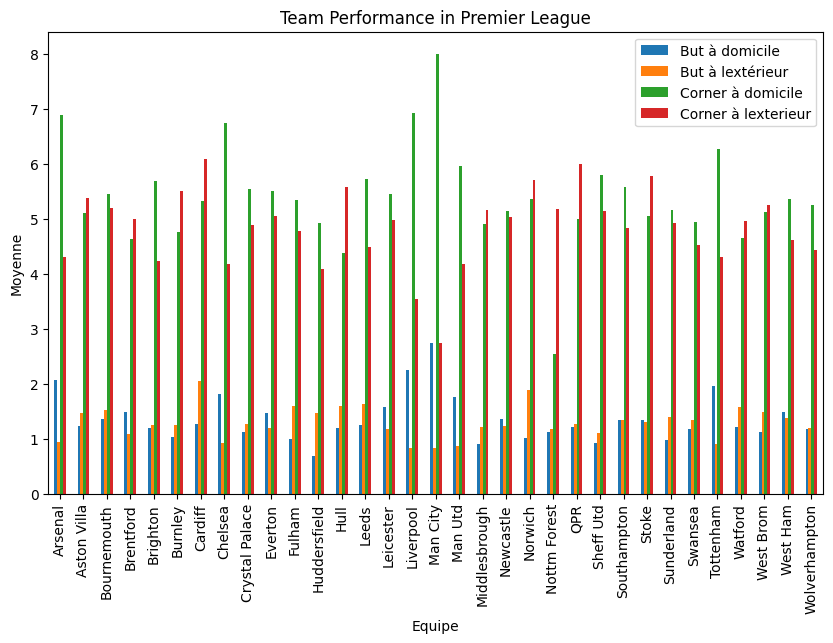

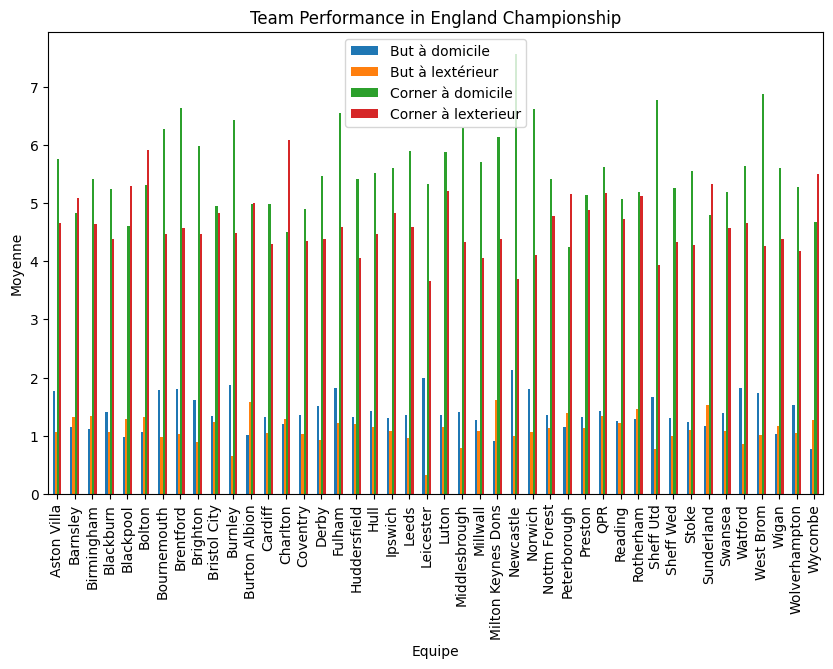

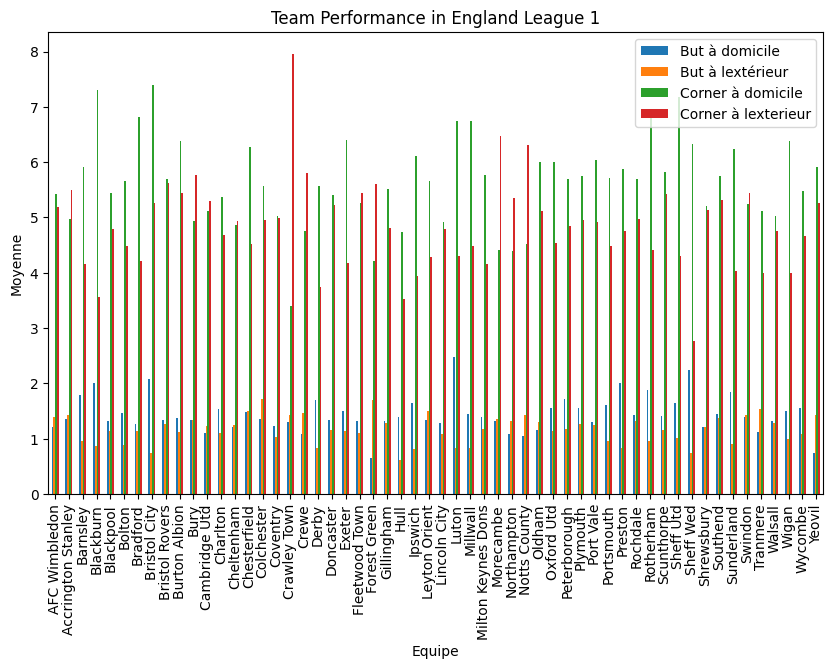

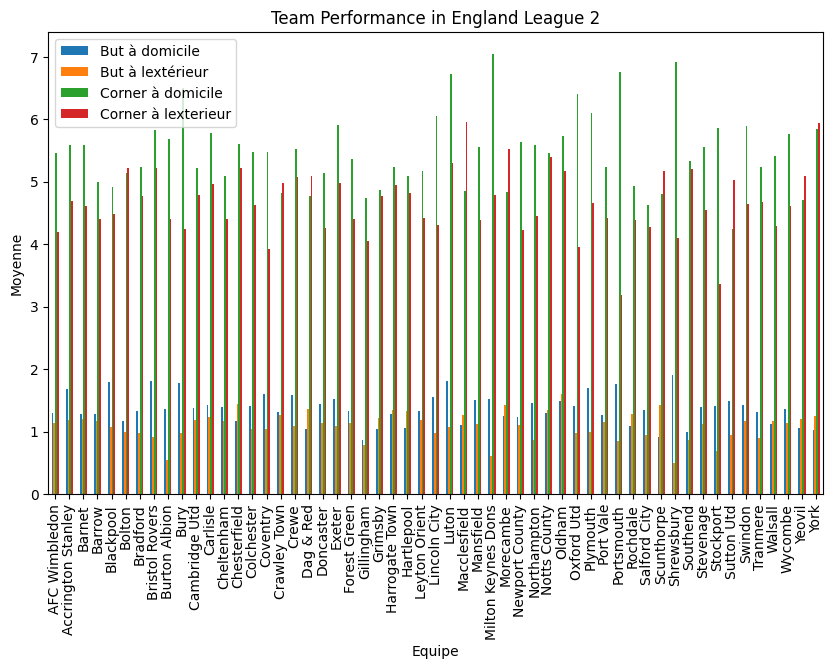

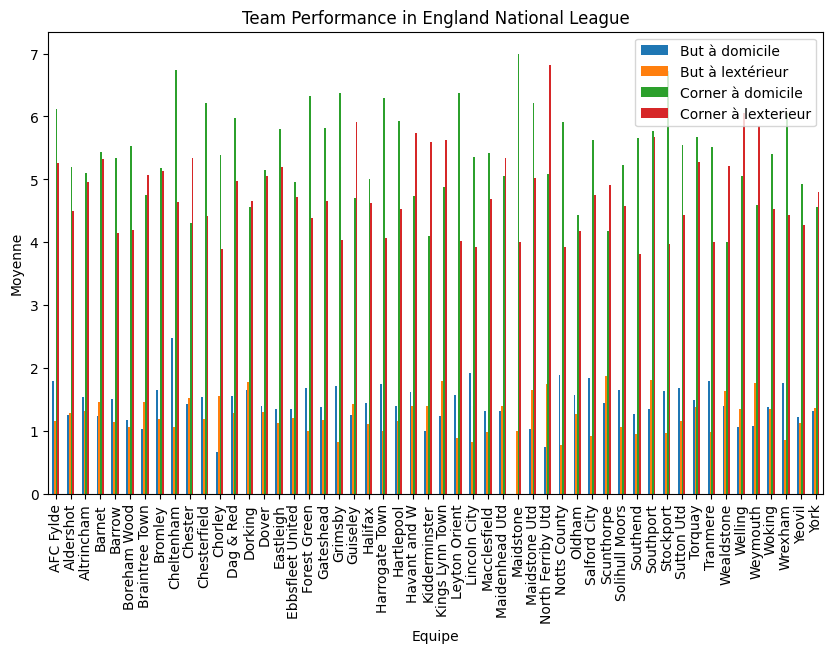

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
tournaments = data['tournament'].unique()
for tournament in tournaments:
    tournament_data = data[data['tournament'] == tournament]
    grouped_data = tournament_data.groupby(['home'])
    team_performance = grouped_data[['home_goal', 'away_goal', 'home_corner', 'away_corner']].mean()
    team_performance.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Equipe')
    plt.ylabel('Moyenne')
    plt.title(f'Team Performance in {tournament}')
    plt.legend(['But à domicile', 'But à l''extérieur', 'Corner à domicile', 'Corner à l''exterieur'])
    plt.show()

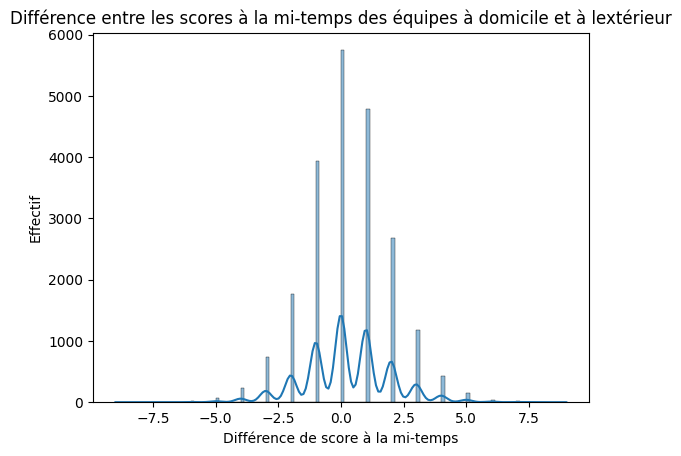

In [29]:
import seaborn as sns
data['ht_diff'] = data['home_goal'] - data['away_goal']
sns.histplot(data=data, x='ht_diff', kde=True)
plt.title('Différence entre les scores à la mi-temps des équipes à domicile et à l''extérieur')
plt.xlabel('Différence de score à la mi-temps')
plt.ylabel('Effectif')
plt.show()